In [322]:
import numpy as np
import pandas as pd

#How has support for Trump shifted across the LatinX population from 2016 to 2020? Was there a significant shift?

In [323]:
data_2016 = pd.read_csv('demographic_voting_2016.csv')

data_2020 = pd.read_csv('demographic_voting_2020.csv')

In [324]:
data_2016 = data_2016.drop(columns = ['Precinct', 'City LatinX Pop %', 'City Dem Votes %', 'City Rep Votes %'])

data_2020 = data_2020.drop(columns = ['Precinct', 'City LatinX Pop %', 'City Dem Votes %', 'City Rep Votes %'])

data_2020 = data_2020.drop(range(68,71))

In [325]:
data_2016['Total LatinX Pop'] = data_2016['Estimate Mexican Population'] + data_2016['Estimate Puerto Rican Population'] + data_2016['Estimate Cuban Population'] + data_2016['Estimate Other Hispanic or Latino']                   

data_2020['Total LatinX Pop'] = data_2020['Estimate Mexican Population'] + data_2020['Estimate Puerto Rican Population'] + data_2020['Estimate Cuban Population'] + data_2020['Estimate Other Hispanic or Latino']       

In [326]:
data_2016 = data_2016.drop(columns = ['Percentage of Total', 'Percentage of Total.1', 'Estimate Mexican Population', 'Estimate Puerto Rican Population', 'Estimate Cuban Population', 'Estimate Other Hispanic or Latino', 'LatinX Pop Percentage', 'Estimate Voting Population: 18+'])

data_2020 = data_2020.drop(columns = ['Percentage of Total', 'Percentage of Total.1', 'Estimate Mexican Population', 'Estimate Puerto Rican Population', 'Estimate Cuban Population', 'Estimate Other Hispanic or Latino', 'LatinX Pop Percentage', 'Estimate Voting Population: 18+'])

In [327]:
data_2016.head()



,City,Tracts,Hillary Clinton,Donald J. Trump,Total Votes Cast,Estimate Total Population,Total LatinX Pop
0,Lynn,2051,1075,735,1810,4893,1528
1,Lynn,2052,968,539,1507,5999,1813
2,Lynn,2053,976,851,1827,4206,402
3,Lynn,2054,930,870,1800,4703,209
4,Lynn,2055,762,336,1098,4948,2438


In [328]:
data_2020.head()

,City,Tracts,"Joseph R. Biden, Jr.",Donald J. Trump,Total Votes Cast,Estimate Total Population,Total LatinX Pop
0,Lynn,2051,1225,725,2002,5660.0,1672.0
1,Lynn,2052,"1,150",494,"1,702",5395.0,2614.0
2,Lynn,2053,"1,238",807,"2,123",4069.0,953.0
3,Lynn,2054,"1,060",853,"1,960",4787.0,440.0
4,Lynn,2055,958,368,"1,363",5253.0,2791.0


In [329]:
data_2016 = data_2016.add_suffix('_2016')

data_2020 = data_2020.add_suffix('_2020')

In [330]:
data_2016.rename(columns={"Tracts_2016": "Tracts"}, inplace = True)

data_2020.rename(columns={"Tracts_2020": "Tracts"}, inplace = True)

In [331]:
data_2016.head()

,City_2016,Tracts,Hillary Clinton_2016,Donald J. Trump_2016,Total Votes Cast_2016,Estimate Total Population_2016,Total LatinX Pop_2016
0,Lynn,2051,1075,735,1810,4893,1528
1,Lynn,2052,968,539,1507,5999,1813
2,Lynn,2053,976,851,1827,4206,402
3,Lynn,2054,930,870,1800,4703,209
4,Lynn,2055,762,336,1098,4948,2438


In [332]:
data_2020.head()

,City_2020,Tracts,"Joseph R. Biden, Jr._2020",Donald J. Trump_2020,Total Votes Cast_2020,Estimate Total Population_2020,Total LatinX Pop_2020
0,Lynn,2051,1225,725,2002,5660.0,1672.0
1,Lynn,2052,"1,150",494,"1,702",5395.0,2614.0
2,Lynn,2053,"1,238",807,"2,123",4069.0,953.0
3,Lynn,2054,"1,060",853,"1,960",4787.0,440.0
4,Lynn,2055,958,368,"1,363",5253.0,2791.0


In [333]:
full_data = pd.merge(data_2016, data_2020, on="Tracts")

In [334]:
full_data.head()

,City_2016,Tracts,Hillary Clinton_2016,Donald J. Trump_2016,Total Votes Cast_2016,Estimate Total Population_2016,Total LatinX Pop_2016,City_2020,"Joseph R. Biden, Jr._2020",Donald J. Trump_2020,Total Votes Cast_2020,Estimate Total Population_2020,Total LatinX Pop_2020
0,Lynn,2051,1075,735,1810,4893,1528,Lynn,1225,725,2002,5660.0,1672.0
1,Lynn,2052,968,539,1507,5999,1813,Lynn,"1,150",494,"1,702",5395.0,2614.0
2,Lynn,2053,976,851,1827,4206,402,Lynn,"1,238",807,"2,123",4069.0,953.0
3,Lynn,2054,930,870,1800,4703,209,Lynn,"1,060",853,"1,960",4787.0,440.0
4,Lynn,2055,762,336,1098,4948,2438,Lynn,958,368,"1,363",5253.0,2791.0


In [335]:
full_data['LatinX Percent_2016'] = full_data['Total LatinX Pop_2016'] / full_data['Estimate Total Population_2016']

full_data['LatinX Percent_2020'] = full_data['Total LatinX Pop_2020'] / full_data['Estimate Total Population_2020']

In [336]:
full_data['Donald J. Trump_2020'] = pd.to_numeric(full_data['Donald J. Trump_2020'])
full_data['Total Votes Cast_2020'] = pd.to_numeric(full_data['Total Votes Cast_2020'])

full_data['Republican Percent_2020'] = full_data['Donald J. Trump_2020'] / full_data['Total Votes Cast_2020']

ValueError: Unable to parse string "1,176" at position 39

In [321]:
full_data['Donald J. Trump_2016'] = pd.to_numeric(full_data['Donald J. Trump_2016'])
full_data['Total Votes Cast_2016'] = pd.to_numeric(full_data['Total Votes Cast_2016'])

full_data['Republican Percent_2016'] = full_data['Donald J. Trump_2016'] / full_data['Total Votes Cast_2016']

ValueError: Unable to parse string "1,224" at position 22

In [209]:
full_data.head()

,City_2016,Tracts,Hillary Clinton_2016,Donald J. Trump_2016,Total Votes Cast_2016,Estimate Total Population_2016,Total LatinX Pop_2016,City_2020,"Joseph R. Biden, Jr._2020",Donald J. Trump_2020,Total Votes Cast_2020,Estimate Total Population_2020,Total LatinX Pop_2020,Republican Percent_2016,Republican Percent_2020
0,Lynn,2051,1075,735,1810,4893,1528,Lynn,1225,725,2002,5660.0,1672.0,0.150215,0.128092
1,Lynn,2052,968,539,1507,5999,1813,Lynn,"1,150",494,"1,702",5395.0,2614.0,0.089848,0.091566
2,Lynn,2053,976,851,1827,4206,402,Lynn,"1,238",807,"2,123",4069.0,953.0,0.202330,0.198329
3,Lynn,2054,930,870,1800,4703,209,Lynn,"1,060",853,"1,960",4787.0,440.0,0.184988,0.178191
4,Lynn,2055,762,336,1098,4948,2438,Lynn,958,368,"1,363",5253.0,2791.0,0.067906,0.070055


In [218]:
#percent change 
full_data['Republican Change'] = (full_data['Republican Percent_2020'] - full_data['Republican Percent_2016']) / full_data['Republican Percent_2016']

full_data['LatinX Pop Change'] = (full_data['Total LatinX Pop_2020'] - full_data['Total LatinX Pop_2016']) / full_data['Total LatinX Pop_2016'] 

full_data.head()

,City_2016,Tracts,Hillary Clinton_2016,Donald J. Trump_2016,Total Votes Cast_2016,Estimate Total Population_2016,Total LatinX Pop_2016,City_2020,"Joseph R. Biden, Jr._2020",Donald J. Trump_2020,Total Votes Cast_2020,Estimate Total Population_2020,Total LatinX Pop_2020,Republican Percent_2016,Republican Percent_2020,difference,LatinX Pop Change,Republican Change
0,Lynn,2051,1075,735,1810,4893,1528,Lynn,1225,725,2002,5660.0,1672.0,0.150215,0.128092,-0.147274,0.094241,-0.147274
1,Lynn,2052,968,539,1507,5999,1813,Lynn,"1,150",494,"1,702",5395.0,2614.0,0.089848,0.091566,0.019121,0.441809,0.019121
2,Lynn,2053,976,851,1827,4206,402,Lynn,"1,238",807,"2,123",4069.0,953.0,0.202330,0.198329,-0.019776,1.370647,-0.019776
3,Lynn,2054,930,870,1800,4703,209,Lynn,"1,060",853,"1,960",4787.0,440.0,0.184988,0.178191,-0.036745,1.105263,-0.036745
4,Lynn,2055,762,336,1098,4948,2438,Lynn,958,368,"1,363",5253.0,2791.0,0.067906,0.070055,0.031646,0.144791,0.031646


In [269]:
data_model = full_data[['Republican Change', 'LatinX Pop Change']]

data_model.head(60)

,Republican Change,LatinX Pop Change
0,-0.147274,0.094241
1,0.019121,0.441809
2,-0.019776,1.370647
3,-0.036745,1.105263
4,0.031646,0.144791
5,0.267048,0.006018
6,0.045781,0.490600
7,-0.028667,0.107331
8,0.128982,0.037545
9,0.815582,-0.024709


In [250]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data_model['Republican Change']
X_array = data_model[['Republican Change']].to_numpy() 

y = data_model['LatinX Pop Change']

X_train, X_test, y_train, y_test = train_test_split(X_array, y, test_size=1/5, random_state=0)

regr = LinearRegression().fit(X_train, y_train)

y_test_predictions = regr.predict(X_test)

In [255]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_test_predictions))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_test_predictions))

Coefficients: 
 [-0.57694041]
Mean squared error: 31.60
Coefficient of determination: -0.02


[[ 2.31646539]
 [ 0.6442124 ]
 [ 0.52746691]
 [ 2.45763512]
 [ 3.34110779]
 [ 0.38288481]
 [ 0.71503381]
 [ 1.12307858]
 [-0.12036412]
 [ 1.43393485]
 [ 1.31025332]
 [ 0.07682221]
 [ 0.07997416]
 [ 1.72879144]]


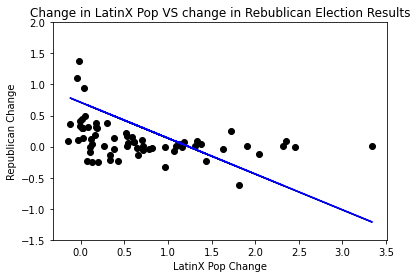

In [270]:
#are these the correct points to scatter?
plt.scatter(X_array, y,  color='black')

plt.plot(X_test, y_test_predictions, "-b")

print(X_test)


plt.xlabel('LatinX Pop Change')
plt.ylabel('Republican Change')
plt.title('Change in LatinX Pop VS change in Rebublican Election Results')

plt.ylim(-1.5, 2)
plt.show()

